 Import the libraries and the style for the plots

In [1]:
!apt-get install texlive-latex-extra cm-super dvipng > /dev/null 2>&1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from google.colab import files as fl
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]
})

Upload files for filtered visibility

In [4]:
#Spectrally filtered data
uploaded = fl.upload()
files_F = list(uploaded.keys())
files_F = sorted(files_F)

Upload files for unfiltered visibility



In [5]:
uploaded = fl.upload()
files_NF = list(uploaded.keys())
files_NF = sorted(files_NF)

Saving position_-0_0000_correlation_correlation.txt to position_-0_0000_correlation_correlation.txt
Saving position_0_0050_correlation_correlation.txt to position_0_0050_correlation_correlation.txt
Saving position_-0_0050_correlation_correlation.txt to position_-0_0050_correlation_correlation.txt
Saving position_0_0100_correlation_correlation.txt to position_0_0100_correlation_correlation.txt
Saving position_-0_0100_correlation_correlation.txt to position_-0_0100_correlation_correlation.txt
Saving position_0_0150_correlation_correlation.txt to position_0_0150_correlation_correlation.txt
Saving position_-0_0151_correlation_correlation.txt to position_-0_0151_correlation_correlation.txt
Saving position_0_0201_correlation_correlation.txt to position_0_0201_correlation_correlation.txt
Saving position_-0_0201_correlation_correlation.txt to position_-0_0201_correlation_correlation.txt
Saving position_-0_0251_correlation_correlation.txt to position_-0_0251_correlation_correlation.txt
Saving p

Prepare and normalize the data, then show individual interference windows both with filters and without them

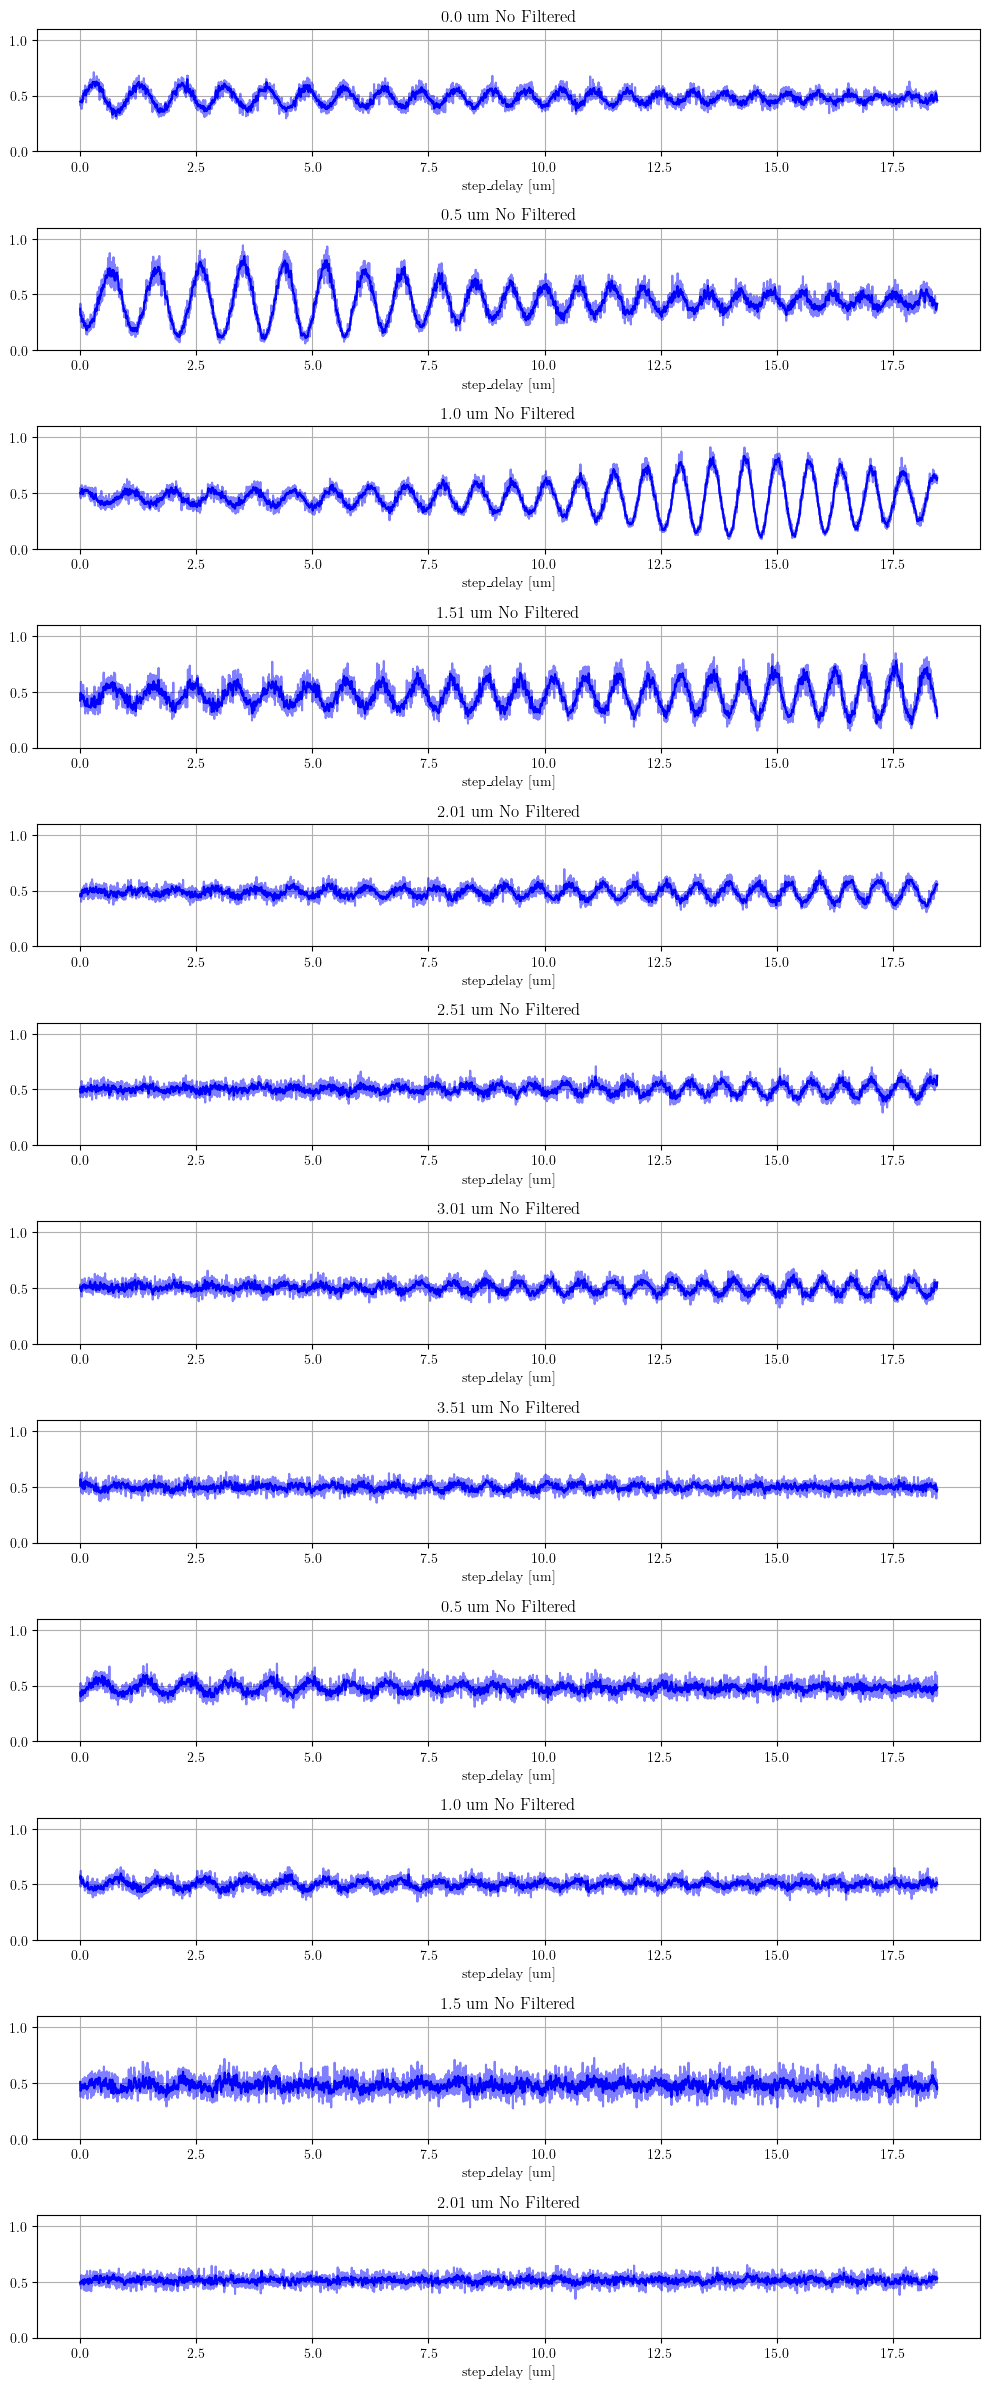

In [10]:

# Without filters


# Pre-loop parameters
position_um_NF = []
data_NF = dict()
NF_useful_window_low_limit = 11_000  #We decide the window for the useful data and discard the rest
NF_useful_window_up_limit = 16_000   #We decide the window for the useful data and discard the rest

for idx in range(len(files_NF)):

    # Preparing the data
    file_NF = files_NF[idx]
    data_NF[idx] = pd.read_csv(file_NF,skiprows=6,delimiter='\t',names=['time','counts'])
    position_um_NF.append(int(str(file_NF).split('/')[-1].split('_')[2])/100)
    df_NF = data_NF[idx]
    time_ps_NF = df_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['time']
    time_ps_NF = np.array(time_ps_NF)
    counts_NF = df_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['counts']
    counts_NF = np.array(counts_NF)
    time_ms_NF = time_ps_NF*1e-9
    step_pos_um_NF = (1-(time_ms_NF-10)/50) * 18.45 # Turn the delay into um with this normalization

    # Normalize the data
    minCts_NF = min(counts_NF)
    maxCts_NF = max(counts_NF)
    doubleMidCts_NF = (minCts_NF + maxCts_NF)
    norCts_NF = np.array(counts_NF/doubleMidCts_NF)
    smoothed_NF = savgol_filter(norCts_NF, window_length=11, polyorder=3)

    # Plot
    if idx == 0:
        [fig, axs] = plt.subplots(nrows = len(files_NF), figsize=(10, 2*len(files_NF)))#,facecolor='k')
    ax = axs[idx]

    ax.plot(step_pos_um_NF,norCts_NF, color="blue", alpha=0.5)
    ax.plot(step_pos_um_NF,smoothed_NF,color="blue")
    ax.set_xlabel('step_delay [um]')
    ax.set_ylim(0,1.1)
    ax.set_title(str(position_um_NF[idx])+' um'+" No Filtered")
    ax.grid()
    fig.tight_layout()

# With filters

# Pre-loop parameters
position_um_F = []
data_F = dict()
F_useful_window_low_limit = 11_500  #We decide the window for the useful data and discard the rest
F_useful_window_up_limit = 14_000   #We decide the window for the useful data and discard the rest

for idx in range(len(files_F)):

    # Preparing the data
    file_F = files_F[idx]
    data_F[idx] = pd.read_csv(file_F,skiprows=6,delimiter='\t',names=['time','counts'])
    position_um_F.append(int(str(file_F).split('/')[-1].split('_')[1])/100)
    df_F = data_F[idx]
    time_ps_F = df_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time']
    time_ps_F = np.array(time_ps_F)
    counts_F = df_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts']
    counts_F = np.array(counts_F)
    time_ms_F = time_ps_F*1e-9
    step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45  # Turn the delay into um with this normalization

    # Normalize the Data
    minCts_F = min(counts_F)
    maxCts_F = max(counts_F)
    doubleMidCts_F = (minCts_F + maxCts_F)
    norCts_F = np.array(counts_F/doubleMidCts_F)
    smoothed_F = savgol_filter(norCts_F, window_length=11, polyorder=3)
    print(max(norCts_F))

    # Plot
    if idx == 0:
        [fig, axs] = plt.subplots(nrows = len(files_F), figsize=(10, 2*len(files_F)))#,facecolor='k')
    ax = axs[idx]

    ax.plot(step_pos_um_F,norCts_F, color="orange", alpha=0.5)
    ax.plot(step_pos_um_F,smoothed_F,color="orange")
    ax.set_xlabel('step_delay [um]')
    ax.set_ylim(0,1.1)
    ax.set_title(str(position_um_F[idx])+' um'+" Filtered")
    ax.grid()
    fig.tight_layout()

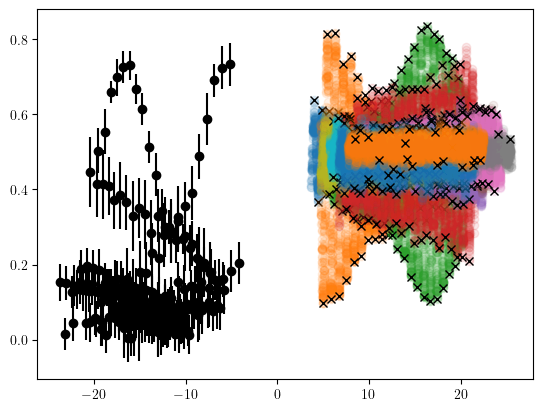

In [12]:
# Pre-loop parameters
rel_position_um_NF = []
zero_NF = 2*157.0 + 12.3
#zero_NF = 326.5
pos_approx_vis_NF = []
avg_approx_vis_NF = []
std_approx_vis_NF = []
delta = 10
NF_useful_window_low_limit = 11_000 #We decide the window for the useful data and discard the rest
NF_useful_window_up_limit = 15_000  #We decide the window for the useful data and discard the rest

for idx in range(len(files_NF)):

    # Preparing the data
    df_NF = data_NF[idx]
    time_ps_NF = df_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['time']
    time_ps_NF = np.array(time_ps_NF)
    counts_NF = df_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['counts']
    counts_NF = np.array(counts_NF)
    time_ms_NF = time_ps_NF*1e-9
    step_pos_um_NF = (1-(time_ms_NF-10)/50) * 18.45

    # Normalize the data
    minCts_NF = min(counts_NF)
    maxCts_NF = max(counts_NF)
    doubleMidCts_NF = (minCts_NF + maxCts_NF)
    norCts_NF = np.array(counts_NF/doubleMidCts_NF)
    smoothed_NF = savgol_filter(norCts_NF, window_length=11, polyorder=3)

    # Calculate the relative delay
    pos = 2*position_um_NF[idx]+ step_pos_um_NF
    rel_position_um_NF = pos-zero_NF

    # Calculate the peaks
    maxsmooth_NF, _ = find_peaks(smoothed_NF, width=19)
    minsmooth_NF, _ = find_peaks(-smoothed_NF, width=19)

    #print(len(maxsmooth_NF), len(minsmooth_NF))    ---- Debugging feature

    # Make the peaks have the same len
    if len(maxsmooth_NF) > len(minsmooth_NF):
      i = len(maxsmooth_NF)-len(minsmooth_NF)
      maxsmooth_NF = maxsmooth_NF[i:]
    elif len(maxsmooth_NF) < len(minsmooth_NF):
      i = len(minsmooth_NF)-len(maxsmooth_NF)
      minsmooth_NF = minsmooth_NF[i:]
    else:
      pass

    # Calculate mean value and std value of the normalize counts and delay for the max and min peaks
    maxpeaks_NF = []
    minpeaks_NF = []
    for i in range(len(maxsmooth_NF)):
      max_i = maxsmooth_NF[i]   # index of the peak
      min_i = minsmooth_NF[i]
      max_below = max_i - delta # Max range index of maximum
      max_above = max_i + delta # Min range index of maximum
      min_below = min_i - delta
      min_above = min_i + delta
      max_value = np.mean(norCts_NF[max_below:max_above])         # Mean value in the range [max_below:max_above]
      max_std = np.std(norCts_NF[max_below:max_above])            # std value in the range [max_below:max_above]
      maxpeaks_NF.append([time_ms_NF[max_i],max_value, max_std])  # Max_peak data
      min_value = np.mean(norCts_NF[min_below:min_above])
      min_std = np.std(norCts_NF[min_below:min_above])
      minpeaks_NF.append([time_ms_NF[min_i],min_value, min_std])
    maxpeaks_NF = np.array(maxpeaks_NF)
    minpeaks_NF = np.array(minpeaks_NF)

    # Calculating average visibility, std visibility and delay
    pos_vis_NF = (rel_position_um_NF[maxsmooth_NF]+rel_position_um_NF[minsmooth_NF])/2
    vis_NF = np.abs(maxpeaks_NF[:,1]-minpeaks_NF[:,1])/(maxpeaks_NF[:,1]+minpeaks_NF[:,1])
    std_vis_NF = np.sqrt((2*maxpeaks_NF[:,1]*minpeaks_NF[:,2])**2+(2*minpeaks_NF[:,1]*maxpeaks_NF[:,2])**2)/((maxpeaks_NF[:,1]+minpeaks_NF[:,1])**2)
    pos_approx_vis_NF += list(pos_vis_NF)
    avg_approx_vis_NF += list(vis_NF)
    std_approx_vis_NF += list(std_vis_NF)

    # PLot
    plt.plot(rel_position_um_NF,smoothed_NF, "o", alpha=0.1)
    plt.plot(rel_position_um_NF[maxsmooth_NF],smoothed_NF[maxsmooth_NF], "x", color="black")
    plt.plot(rel_position_um_NF[minsmooth_NF],smoothed_NF[minsmooth_NF], "x", color="black")
    plt.errorbar(-pos_vis_NF, vis_NF, yerr=std_vis_NF, fmt="o", color="black")  # Le meto una simetria guarra

plt.show()
plt.close()

# Pre-loop parameters
rel_position_um_F = []
zero_F = 2*252 + 9
pos_approx_vis_F = []
avg_approx_vis_F = []
std_approx_vis_F = []
F_useful_window_low_limit = 11_500  #We decide the window for the useful data and discard the rest
F_useful_window_up_limit = 14_500   #We decide the window for the useful data and discard the rest

for idx in range(len(files_F)):

    # Preparing the data
    df_F = data_F[idx]
    time_ps_F = df_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time']
    time_ps_F = np.array(time_ps_F)
    counts_F = df_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts']
    counts_F = np.array(counts_F)
    time_ms_F = time_ps_F*1e-9
    step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

    # Normalize the data
    minCts_F = min(counts_F)
    maxCts_F = max(counts_F)
    doubleMidCts_F = (minCts_F + maxCts_F)
    norCts_F = np.array(counts_F/doubleMidCts_F)
    smoothed_F = savgol_filter(norCts_F, window_length=11, polyorder=3)

    # Calculate rel delay
    pos = 2*position_um_F[idx]+ step_pos_um_F
    rel_position_um_F = pos-zero_F

    # Calculate the peaks
    maxsmooth_F, _ = find_peaks(smoothed_F, width=19)
    minsmooth_F, _ = find_peaks(-smoothed_F, width=19)

    # print(len(maxsmooth_F), len(minsmooth_F))    ---- Debugging feature

    # Make the peaks have the same len
    if len(maxsmooth_F) > len(minsmooth_F):
      i = len(maxsmooth_F)-len(minsmooth_F)
      maxsmooth_F = maxsmooth_F[i:]
    elif len(maxsmooth_F) < len(minsmooth_F):
      i = len(minsmooth_F)-len(maxsmooth_F)
      minsmooth_F = minsmooth_F[i:]
    else:
      pass

    # Calculating average peaks
    maxpeaks_F = []
    minpeaks_F = []
    for i in range(len(maxsmooth_F)):
      max_i = maxsmooth_F[i]
      min_i = minsmooth_F[i]
      max_below = max_i - delta
      max_above = max_i + delta
      min_below = min_i - delta
      min_above = min_i + delta
      max_value = np.mean(norCts_F[max_below:max_above])
      max_std = np.std(norCts_F[max_below:max_above])
      maxpeaks_F.append([time_ms_F[max_i],max_value, max_std])
      min_value = np.mean(norCts_F[min_below:min_above])
      min_std = np.std(norCts_F[min_below:min_above])
      minpeaks_F.append([time_ms_F[min_i],min_value, min_std])
    maxpeaks_F = np.array(maxpeaks_F)
    minpeaks_F = np.array(minpeaks_F)

    # Calculating average visibility, std visibility and delay
    pos_vis_F = (rel_position_um_F[maxsmooth_F]+rel_position_um_F[minsmooth_F])/2
    vis_F = np.abs(maxpeaks_F[:,1]-minpeaks_F[:,1])/(maxpeaks_F[:,1]+minpeaks_F[:,1])
    std_vis_F = np.sqrt((2*maxpeaks_F[:,1]*minpeaks_F[:,2])**2+(2*minpeaks_F[:,1]*maxpeaks_F[:,2])**2)/((maxpeaks_F[:,1]+minpeaks_F[:,1])**2)
    pos_approx_vis_F += list(pos_vis_F)
    avg_approx_vis_F += list(vis_F)
    std_approx_vis_F += list(std_vis_F)

    # Plot
    plt.plot(rel_position_um_F,smoothed_F, "o", alpha=0.1)
    plt.plot(rel_position_um_F,smoothed_F, "o", alpha=0.1)
    plt.plot(rel_position_um_F[maxsmooth_F],smoothed_F[maxsmooth_F], "x", color="black")
    plt.plot(rel_position_um_F[minsmooth_F],smoothed_F[minsmooth_F], "x", color="black")
    plt.errorbar(pos_vis_F, vis_F, yerr=std_vis_F, fmt="o", color="black")

<ipython-input-8-fe1ee2573524>:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


[1025.35   1025.3377 1025.3254 ...  988.4869  988.4746  988.4623]


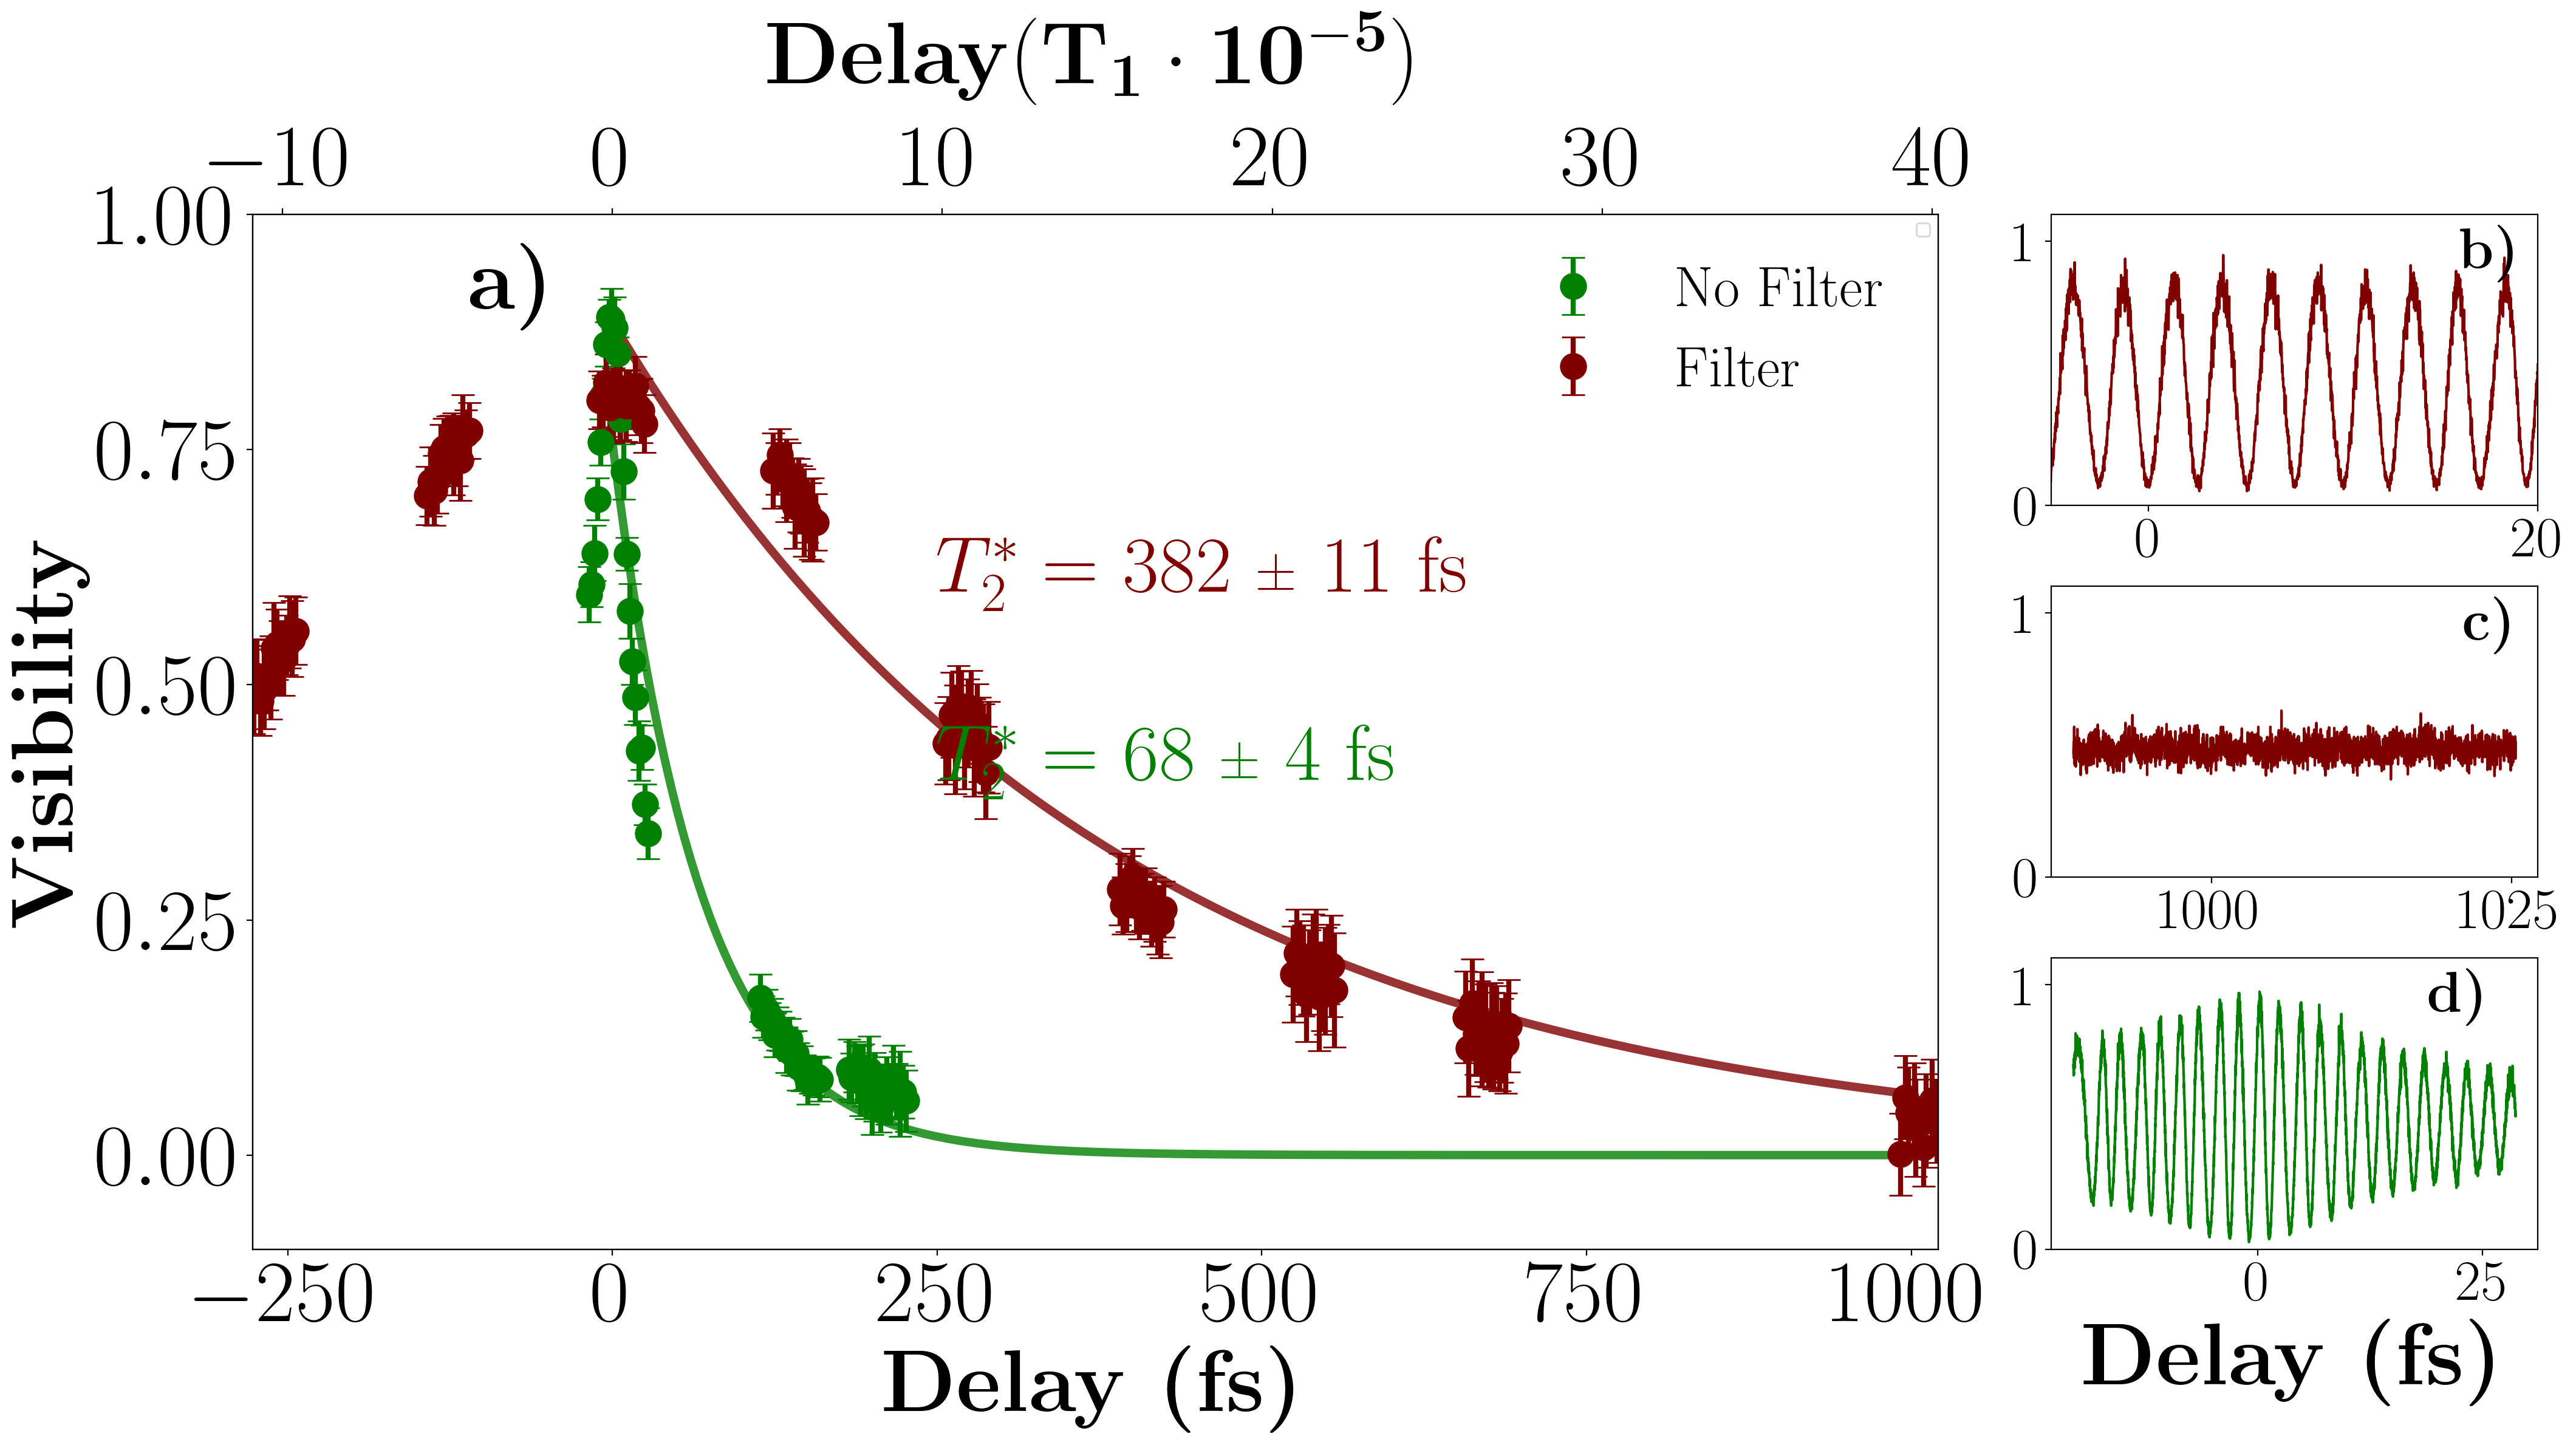

In [ ]:
# Fitting model
def exp_model(t, A, m):
  return A * np.exp(-t/m)

# x-label scales
t1 = 2.54 * 10**(6)
delay_fs_NF = -np.array(pos_approx_vis_NF)/0.3
delay_fs_F = np.array(pos_approx_vis_F)/0.3

# Preparing the data that would be fit
# No-Filter
delay_fit_NF=[]
vis_fit_NF=[]
std_fit_NF=[]
for i in range(len(delay_fs_NF)):
  if delay_fs_NF[i] > 0:
    delay_fit_NF.append(delay_fs_NF[i])
    vis_fit_NF.append(avg_approx_vis_NF[i])
    std_fit_NF.append(std_approx_vis_NF[i])

# Filter
delay_fit_F = []
vis_fit_F = []
std_fit_F = []
for i in range(len(delay_fs_F)):
  if delay_fs_F[i] > 0:
    delay_fit_F.append(delay_fs_F[i])
    vis_fit_F.append(avg_approx_vis_F[i])
    std_fit_F.append(std_approx_vis_F[i])

# Fit the curve
popt_NF, pcov_NF = curve_fit(exp_model, delay_fit_NF, vis_fit_NF, sigma=std_fit_NF, p0=[1,50])
popt_F, pcov_F = curve_fit(exp_model, delay_fit_F, vis_fit_F, sigma=std_fit_F, p0=[1,150])

# Extract fit parameters and their uncertainties
A_NF, m_NF = popt_NF
A_err_NF, m_err_NF = np.sqrt(np.diag(pcov_NF))
A_F, m_F = popt_F
A_err_F, m_err_F = np.sqrt(np.diag(pcov_F))

# Plot Configuration
fig = plt.figure(figsize=(21, 12), dpi=200)
gs = gridspec.GridSpec(nrows=3, ncols=4)
font_size = 52
font = "serif"
ax = fig.add_subplot(gs[:, :-1]) # Main Plot
ax_osc = fig.add_subplot(gs[0, -1]) # Zero Delay osc F
ax_osc2 = fig.add_subplot(gs[1, -1]) # Late Delay osc F
ax_osc3 = fig.add_subplot(gs[2, -1]) # Zero Delay osc NF

"""           AX ----- MAIN PLOT          """
# Curves
fs_fit=np.linspace(0,1000,200) # Fit delay
ax.plot(fs_fit,exp_model(fs_fit, A_NF, m_NF),color="green", alpha=0.8, linewidth = 5)
ax.plot(fs_fit,exp_model(fs_fit, A_F, m_F),color="maroon", alpha=0.8, linewidth = 5)
ax.errorbar(delay_fs_NF,avg_approx_vis_NF, yerr=std_approx_vis_NF ,fmt='o', color= "green",ms=15, label="No Filter", capsize=7, alpha=1, elinewidth= 3 )
ax.errorbar(delay_fs_F,avg_approx_vis_F, yerr=std_approx_vis_F ,fmt='o', color= "maroon",ms=15, label="Filter", capsize=7, alpha=1, elinewidth= 3)

# Labels
ax.set_xlabel(r'$\textbf{Delay (fs)}$ ', fontsize=font_size, fontfamily=font)
#ax.grid()
ax.set_ylabel(r'$\textbf{Visibility}$', fontsize=font_size, fontfamily=font)

# Changing the ax1 x axis from um to T1
ax.tick_params(axis='both', which='major', labelsize=font_size)
XLIM = [min(delay_fs_F)-1, max(delay_fs_F)+1]
ax.set_xlim(XLIM)

# Information
ax.text(250, 0.6, s=r'$T_2^{*} = $'+f" {int(np.round(m_F))} ± {int(np.round(m_err_F))} fs", color="maroon", fontsize = font_size-5)
ax.text(250, 0.4, s=r'$T_2^{*} = $'+f" {int(np.round(m_NF))} ± {int(np.round(m_err_NF))} fs", color="green", fontsize = font_size-5)
ax.legend(fontsize=2*font_size//3, frameon=False)
ax.text(-110, 0.9, r'\textbf{a)}', fontsize=font_size)
ax2 = ax.twiny()
ax2.set_xlabel(r'$\mathbf{Delay (T_1\cdot 10^{-5})}$', fontsize=font_size, fontfamily=font, labelpad = 25)
ax2.set_xlim(np.array(ax.get_xlim())/t1 * 1e5)  # This allign the zeros of the top and bottom xlabels.
ax2.set_ylim(-0.1, 1.0)
ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.legend()


"""           AX_OSC ----- ZERO DELAY OSCILLATION FILTER           """

# Getting the data
idx_F = 2                     # Index of the file we want to plot
zero_F = 252 + 9              # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
ax_osc.plot(delay_fs_F,norCts_F, color="maroon", alpha=1)
ax_osc.set_xlim(-5,20)
ax_osc.set_ylim(0,1.1)
ax_osc.text(16, 0.9, r'\textbf{b)}', fontsize=2*font_size//3)

#ax_osc.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc.tick_params(axis='both', which='major', labelsize=2*font_size//3)

"""           AX_OSC ----- LATE DELAY OSCILLATION FILTER           """

# Getting the data
idx_F = 8                     # Index of the file we want to plot
zero_F = 2*252 + 9
#zero_F = 0               # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
print(delay_fs_F)
ax_osc2.plot(delay_fs_F,norCts_F, color="maroon", alpha=1)
#ax_osc2.set_xlim(1000,1025)
ax_osc2.set_ylim(0,1.1)
#ax_osc2.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_title("Late Delay", fontsize=font_size, fontfamily=font)
ax_osc2.text(1021, 0.9, r'\textbf{c)}', fontsize=2*font_size//3)
ax_osc2.tick_params(axis='both', which='major', labelsize=2*font_size//3)

"""           AX_OSC ----- ZERO DELAY OSCILLATION NO FILTER           """

# Getting the data
idx_NF = 0                # Index of the file we want to plot
zero_NF = 2*157.0 + 12.3
#zero_NF = 0    # Value assigned to the zero delay
zero_data_NF = data_NF[idx_NF]
time_ps_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['time'])
counts_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['counts'])
time_ms_NF = time_ps_NF*1e-9
step_pos_um_NF = (1-(time_ms_NF-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_NF[idx_NF]+ step_pos_um_NF
rel_position_um_NF = pos-zero_NF

# From um to fs
delay_fs_NF = rel_position_um_NF/0.3

# Normalize the data
minCts_NF = min(counts_NF)
maxCts_NF = max(counts_NF)
doubleMidCts_NF = (minCts_NF + maxCts_NF)
norCts_NF = np.array(counts_NF/doubleMidCts_NF)

# Plot
ax_osc3.plot(-delay_fs_NF,norCts_NF, color="green", alpha=1)
#ax_osc3.yaxis.tick_right()  # Mueve los ticks
#ax_osc3.yaxis.set_label_position("right")  # Mueve el título del eje Y
#ax_osc3.set_xlim(-5,20)
ax_osc3.set_ylim(0,1.1)
ax_osc3.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
ax_osc3.text(19, 0.9, r'\textbf{d)}', fontsize=2*font_size//3)
#ax_osc3.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc3.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc3.tick_params(axis='both', which='major', labelsize=2*font_size//3)
plt.tight_layout()


0.41640779386921084 0.011902635489315359
[[-2.43899667e+02  5.57326927e-01  3.61164613e-02]
 [-2.46322767e+02  5.48930511e-01  4.01526289e-02]
 [-2.48592117e+02  5.55898907e-01  3.82713750e-02]
 [-2.50904517e+02  5.42275343e-01  3.17964047e-02]
 [-2.53272267e+02  5.27390600e-01  3.87614491e-02]
 [-2.55689217e+02  5.28123658e-01  3.96549879e-02]
 [-2.58173817e+02  5.42718017e-01  3.75990305e-02]
 [-2.60535417e+02  5.38992870e-01  4.84529812e-02]
 [-2.62995417e+02  5.07662211e-01  4.40293645e-02]
 [-2.65553817e+02  5.07347339e-01  3.40802448e-02]
 [-2.68118367e+02  4.95107632e-01  4.23100752e-02]
 [-2.70707517e+02  4.83086447e-01  3.69165273e-02]
 [-2.73431967e+02  5.09092889e-01  3.91486736e-02]
 [-2.76082617e+02  4.98324022e-01  5.06389804e-02]
 [-1.10178883e+02  7.70161290e-01  2.99441367e-02]
 [-1.12620433e+02  7.66219113e-01  2.56564553e-02]
 [-1.14902083e+02  7.73572076e-01  3.45081904e-02]
 [-1.17183733e+02  7.38311394e-01  4.21374356e-02]
 [-1.19649883e+02  7.44487535e-01  3.3015

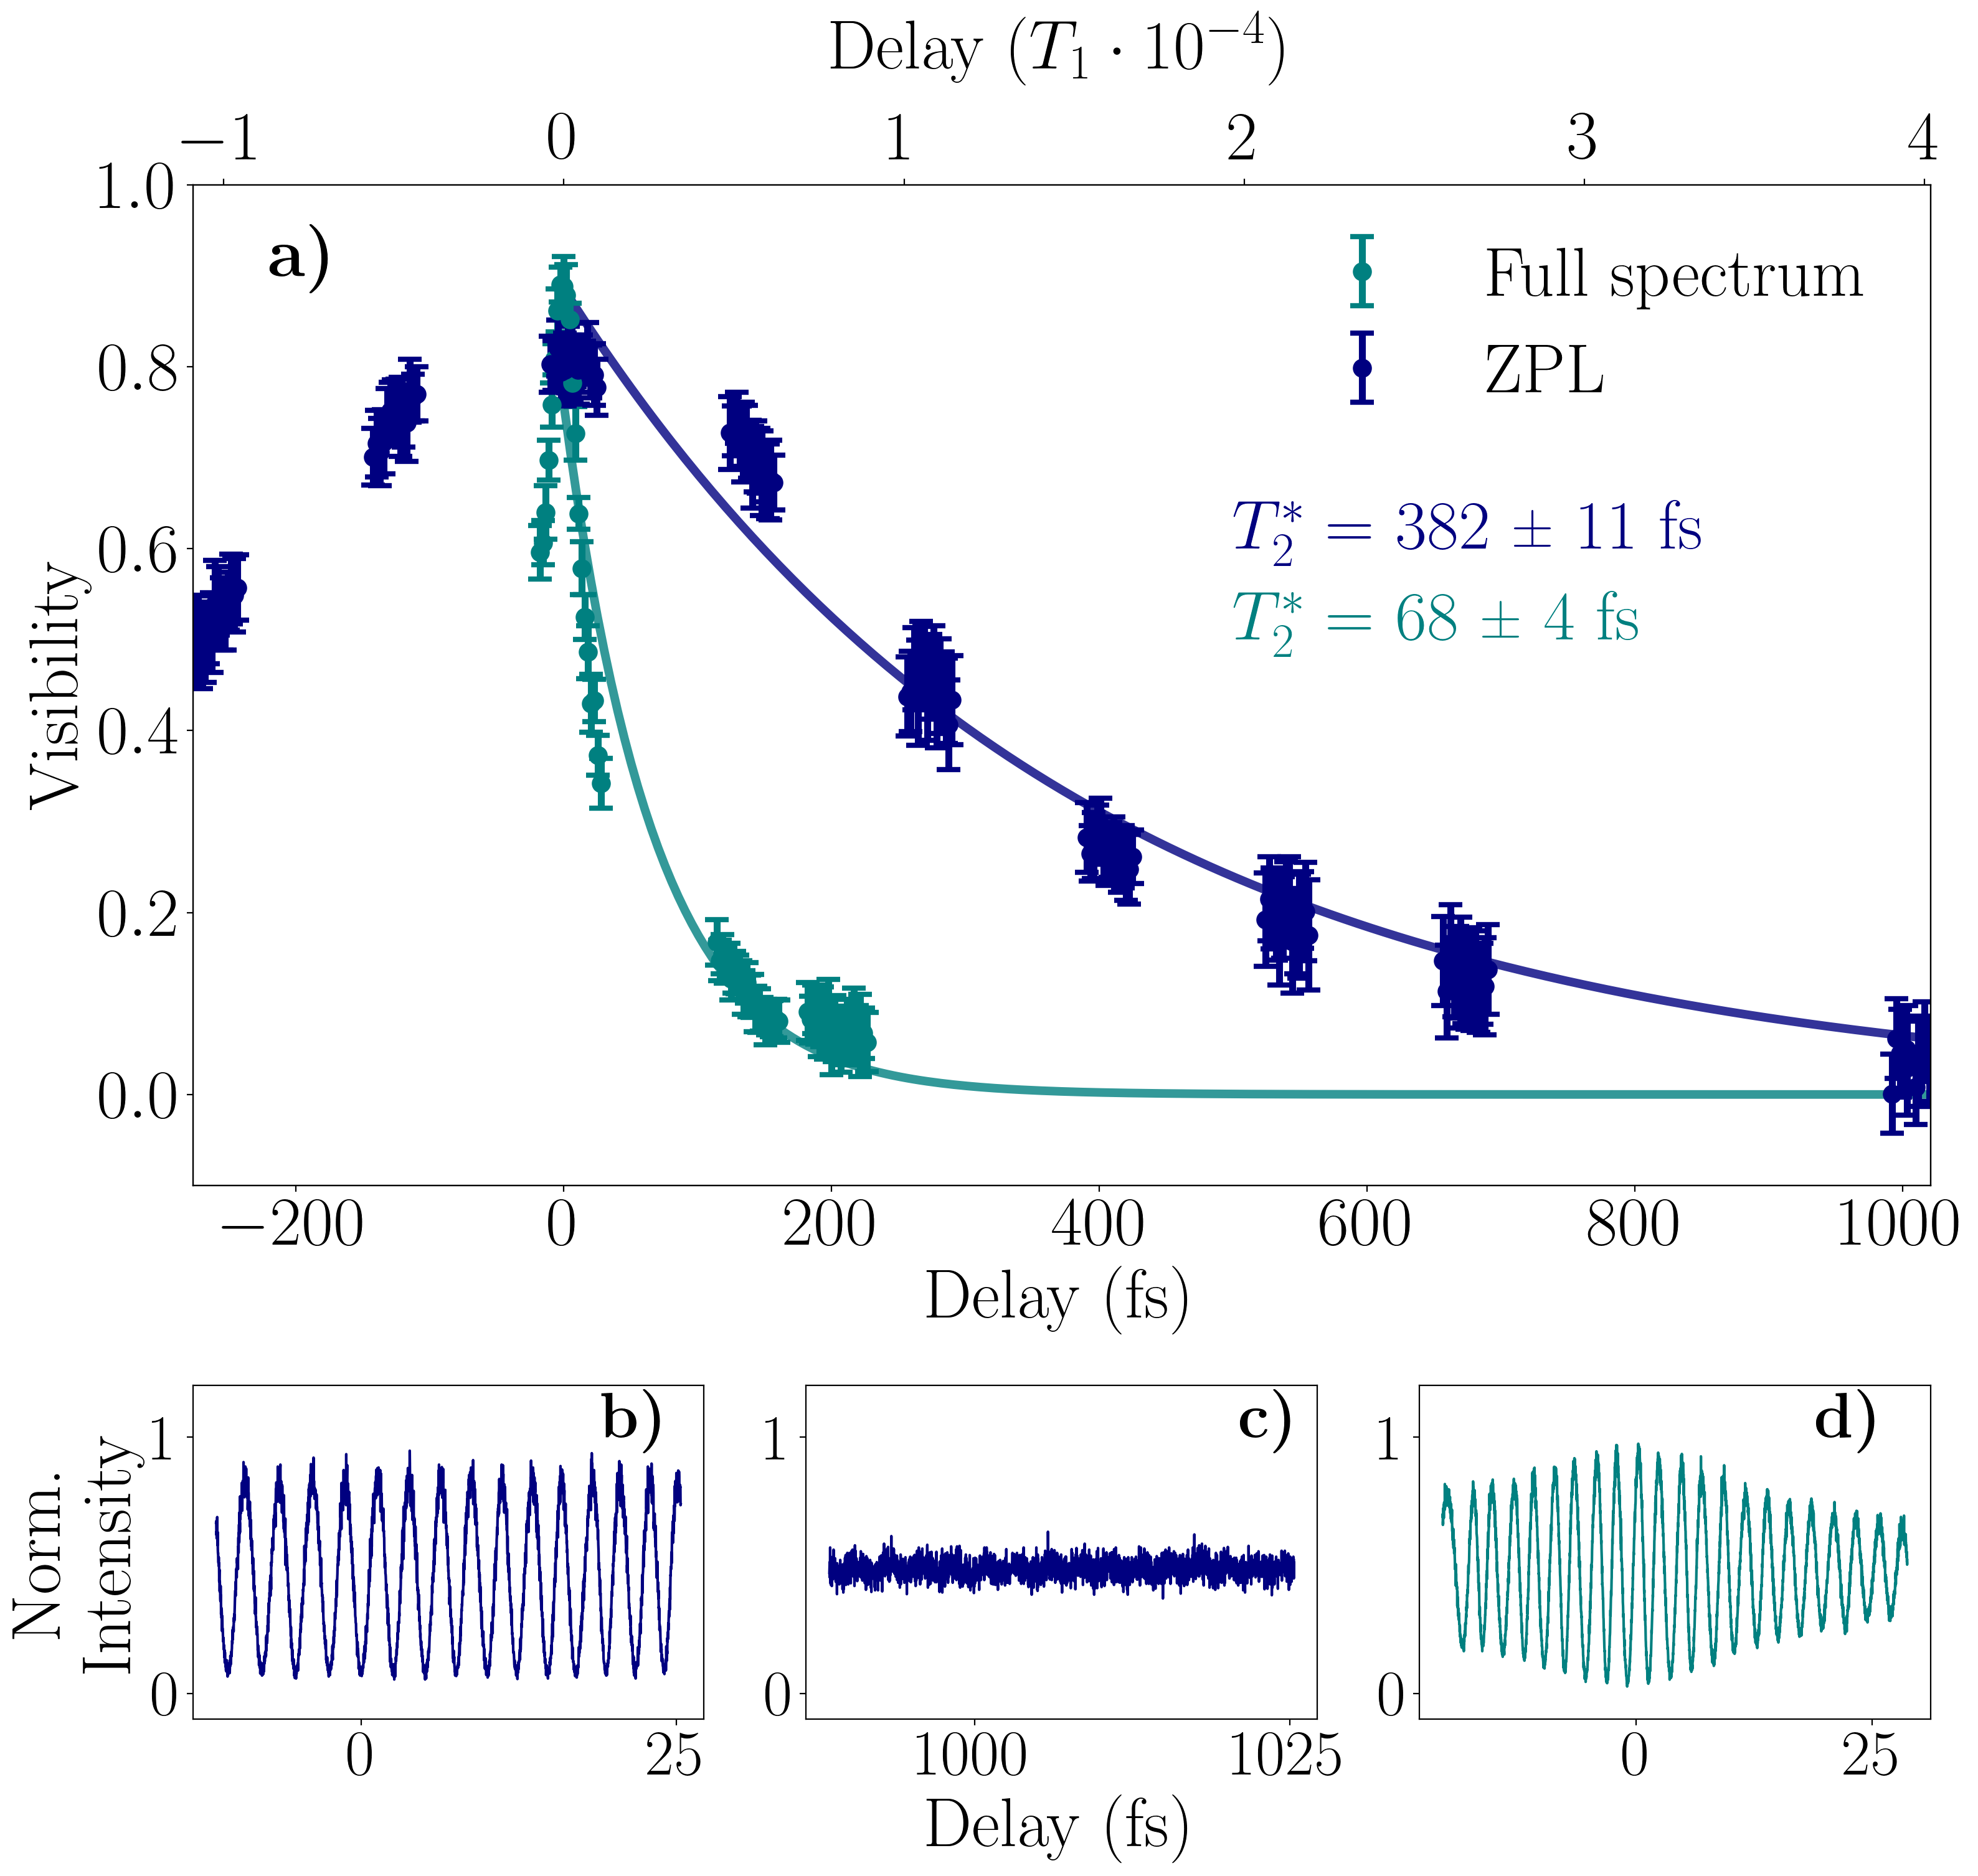

In [ ]:
# Fitting model
def exp_model(t, A, m):
  return A * np.exp(-t/m)


"""Preparing data"""
# x-label scales
t1 = 2.54 * 10**(6)
delay_fs_NF = -np.array(pos_approx_vis_NF)/0.3
delay_fs_F = np.array(pos_approx_vis_F)/0.3

# Preparing the data that would be fit
# No-Filter
delay_fit_NF=[]
vis_fit_NF=[]
std_fit_NF=[]
for i in range(len(delay_fs_NF)):
  if delay_fs_NF[i] > 0:
    delay_fit_NF.append(delay_fs_NF[i])
    vis_fit_NF.append(avg_approx_vis_NF[i])
    std_fit_NF.append(std_approx_vis_NF[i])

# Filter
delay_fit_F = []
vis_fit_F = []
std_fit_F = []
for i in range(len(delay_fs_F)):
  if delay_fs_F[i] > 0:
    delay_fit_F.append(delay_fs_F[i])
    vis_fit_F.append(avg_approx_vis_F[i])
    std_fit_F.append(std_approx_vis_F[i])

# Fit the curve
popt_NF, pcov_NF = curve_fit(exp_model, delay_fit_NF, vis_fit_NF, sigma=std_fit_NF, p0=[1,50])
popt_F, pcov_F = curve_fit(exp_model, delay_fit_F, vis_fit_F, sigma=std_fit_F, p0=[1,150])

# Extract fit parameters and their uncertainties
A_NF, m_NF = popt_NF
A_err_NF, m_err_NF = np.sqrt(np.diag(pcov_NF))
A_F, m_F = popt_F
A_err_F, m_err_F = np.sqrt(np.diag(pcov_F))

# Plot Configuration
fig = plt.figure(figsize=(18, 16), dpi=200)
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.2)

font_size = 40
font = "serif"
ax = fig.add_subplot(gs[0]) # Main plot
ax_osc  = fig.add_subplot(gs_bottom[0])  # left small
ax_osc2 = fig.add_subplot(gs_bottom[1], sharey=ax_osc) # middle small
ax_osc3 = fig.add_subplot(gs_bottom[2], sharey=ax_osc) # right small





"""           Main Plot (Vis. vs Delay)         """
# Curves
fs_fit=np.linspace(0,1100,220) # Fit delay
ax.plot(fs_fit,exp_model(fs_fit, A_NF, m_NF),color="teal", alpha=0.8, linewidth = 5)
ax.plot(fs_fit,exp_model(fs_fit, A_F, m_F),color="navy", alpha=0.8, linewidth = 5)
ax.errorbar(delay_fs_NF,avg_approx_vis_NF, yerr=std_approx_vis_NF ,fmt='o', color= "teal",ms=10, label="Full spectrum", capsize=7, alpha=1, elinewidth= 4, capthick=3 )
ax.errorbar(delay_fs_F,avg_approx_vis_F, yerr=std_approx_vis_F ,fmt='o', color= "navy",ms=10, label="ZPL", capsize=7, alpha=1, elinewidth= 4, capthick=3)
dataStack = np.column_stack((delay_fs_F,avg_approx_vis_F, std_approx_vis_F))
# dir_path = r'/Users/maxbehrens/OneDrive - UAM/Proyecto de grado/Data'
# write_data = np.column_stack((delay_fs_F, avg_approx_vis_F, std_approx_vis_F))
# np.savetxt(dir_path + r"/5mWVisData.txt", write_data, header="delay vis error", comments='')

# Labels
ax.set_xlabel(r'Delay (fs)', fontsize=font_size, fontfamily=font)
#ax.grid()
ax.set_ylabel(r'Visibility', fontsize=font_size, fontfamily=font)

# Changing the ax1 x axis from um to T1
ax.tick_params(axis='both', which='major', labelsize=font_size)
XLIM = [min(delay_fs_F)-1, max(delay_fs_F)+1]
ax.set_xlim(XLIM)

# Convert to Hz
# Error conversion is dy = dx/(2pi*x^2)
m_F_Hz = 1/(2*np.pi*m_F*1e-15) / 1e12 # Convert to THz
m_err_F_Hz = m_err_F * 1e-15/(2*np.pi*(m_F*1e-15)**2) / 1e12
m_NF_Hz = 1/(2*np.pi*m_NF*1e-15) / 1e12 # Convert to THz
m_err_NF_Hz = m_err_NF * 1e-15/(2*np.pi*(m_NF*1e-15)**2) / 1e12
print(m_F_Hz, m_err_F_Hz)
# Information
ax.text(500, 0.6, s=r'$T_2^{*} = $'+f" {int(np.round(m_F))} ± {int(np.round(m_err_F))} fs", color="navy", fontsize = font_size)
ax.text(500, 0.5, s=r'$T_2^{*} = $'+f" {int(np.round(m_NF))} ± {int(np.round(m_err_NF))} fs", color="teal", fontsize = font_size)
#ax.text(250, 0.6, s=r'$\gamma^{*} = $'+f" {np.round(m_F_Hz, 2)} ± {np.round(m_err_F_Hz, 2)} THz", color="navy", fontsize = font_size)
#ax.text(250, 0.5, s=r'$\gamma^{*} = $'+f" {np.round(m_NF_Hz, 2)} ± {np.round(m_err_NF_Hz, 2)} THz", color="teal", fontsize = font_size)
ax.legend(fontsize=font_size, frameon=False)
ax.text(-220, 0.9, r'\textbf{a)}', fontsize=font_size)
ax2 = ax.twiny()
ax2.set_xlabel(r'Delay $(T_1\cdot 10^{-4})$', fontsize=font_size, fontfamily=font, labelpad = 25)
ax2.set_xlim(np.array(ax.get_xlim())/t1 * 1e4)  # This allign the zeros of the top and bottom xlabels.
ax2.set_ylim(-0.1, 1.0)
ax2.tick_params(axis='both', which='major', labelsize=font_size)





"""         ax_osc -- Zero Delay Filtered           """
# Getting the data
idx_F = 2                     # Index of the file we want to plot
zero_F = 2*252 + 9              # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
ax_osc.plot(delay_fs_F,norCts_F, color="navy", alpha=1)
#ax_osc.set_xlim(-5,20)
ax_osc.set_ylim(-0.1,1.2)
ax_osc.text(19, 1, r'\textbf{b)}', fontsize=font_size-3)
ax_osc.set_ylabel(r'Norm.' + '\n'+ r'Intensity', fontsize=font_size, fontfamily=font)

#ax_osc.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc.tick_params(axis='both', which='major', labelsize=font_size-3)





"""           ax_osc2 ----- Late Delay Filtered           """
# Getting the data
idx_F = 8                     # Index of the file we want to plot
zero_F = 2*252 + 9              # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
ax_osc2.plot(delay_fs_F,norCts_F, color="navy", alpha=1)
#ax_osc2.set_xlim(500,525)
ax_osc2.set_ylim(-0.1,1.2)
#ax_osc2.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_title("Late Delay", fontsize=font_size, fontfamily=font)
ax_osc2.text(1021, 1, r'\textbf{c)}', fontsize=font_size-3)
ax_osc2.tick_params(axis='both', which='major', labelsize=font_size-3)
ax_osc2.set_xlabel(r'Delay (fs)', fontsize=font_size, fontfamily=font)





"""           ax_osc3 ----- Zero delay no filter         """
# Getting the data
idx_NF = 0                # Index of the file we want to plot
zero_NF = 2*157.0 + 12.3    # Value assigned to the zero delay
zero_data_NF = data_NF[idx_NF]
time_ps_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['time'])
counts_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['counts'])
time_ms_NF = time_ps_NF*1e-9
step_pos_um_NF = (1-(time_ms_NF-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_NF[idx_NF]+ step_pos_um_NF
rel_position_um_NF = pos-zero_NF

# From um to fs
delay_fs_NF = rel_position_um_NF/0.3

# Normalize the data
minCts_NF = min(counts_NF)
maxCts_NF = max(counts_NF)
doubleMidCts_NF = (minCts_NF + maxCts_NF)
norCts_NF = np.array(counts_NF/doubleMidCts_NF)

# Plot
ax_osc3.plot(-delay_fs_NF,norCts_NF, color="teal", alpha=1)
#ax_osc3.yaxis.tick_right()  # Mueve los ticks
#ax_osc3.yaxis.set_label_position("right")  # Mueve el título del eje Y
#ax_osc3.set_xlim(-5,20)
ax_osc3.set_ylim(-0.1,1.2)
ax_osc3.text(19, 1, r'\textbf{d)}', fontsize=font_size-3)
#ax_osc3.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc3.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc3.tick_params(axis='both', which='major', labelsize=font_size-3)

# Combinar los arrays en una matriz de dos columnas


print(dataStack)
# Guardar en un archivo de texto
np.savetxt("datosVisibilidadF2.txt", dataStack, delimiter=';', header='Delays;Visibility;Error')

**ACS format**

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "helvetica",
    "font.serif": ["helvetica"]
})

0.41640779386921084 0.011902635489315359


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

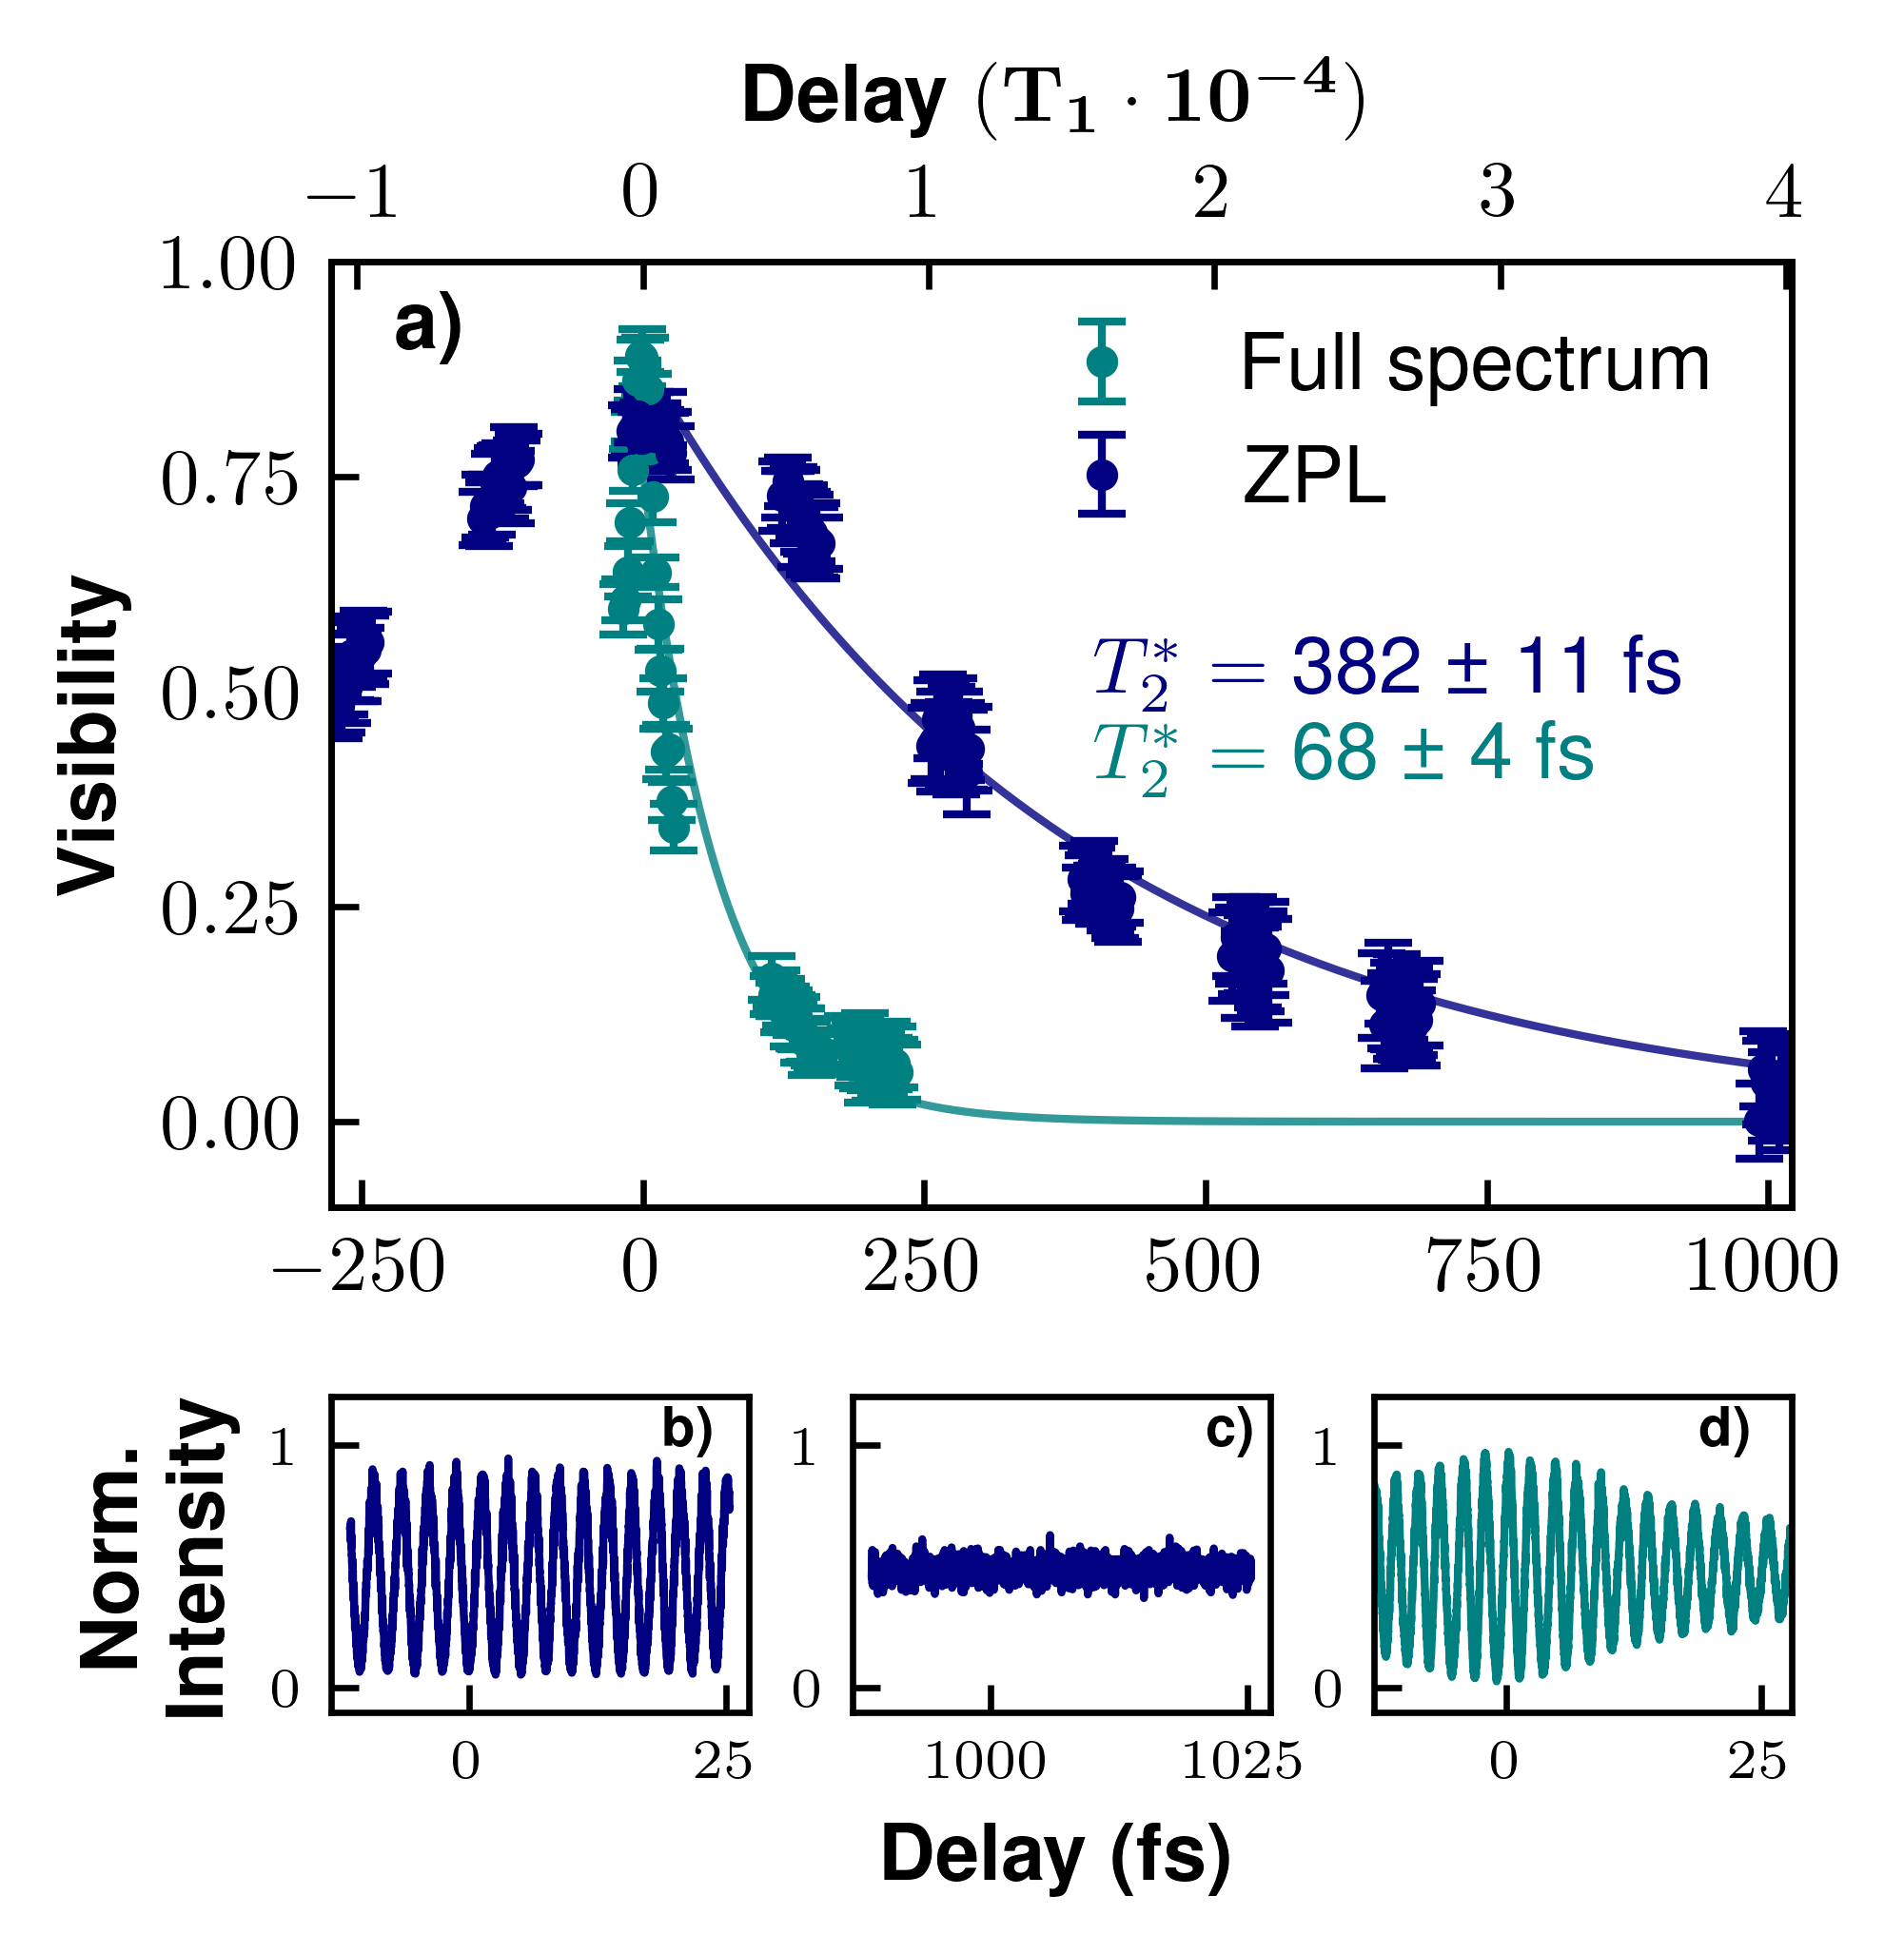

In [ ]:
from google.colab import files
# Fitting model
def exp_model(t, A, m):
  return A * np.exp(-t/m)


"""Preparing data"""
# x-label scales
t1 = 2.54 * 10**(6)
delay_fs_NF = -np.array(pos_approx_vis_NF)/0.3
delay_fs_F = np.array(pos_approx_vis_F)/0.3

# Preparing the data that would be fit
# No-Filter
delay_fit_NF=[]
vis_fit_NF=[]
std_fit_NF=[]
for i in range(len(delay_fs_NF)):
  if delay_fs_NF[i] > 0:
    delay_fit_NF.append(delay_fs_NF[i])
    vis_fit_NF.append(avg_approx_vis_NF[i])
    std_fit_NF.append(std_approx_vis_NF[i])

# Filter
delay_fit_F = []
vis_fit_F = []
std_fit_F = []
for i in range(len(delay_fs_F)):
  if delay_fs_F[i] > 0:
    delay_fit_F.append(delay_fs_F[i])
    vis_fit_F.append(avg_approx_vis_F[i])
    std_fit_F.append(std_approx_vis_F[i])

# Fit the curve
popt_NF, pcov_NF = curve_fit(exp_model, delay_fit_NF, vis_fit_NF, sigma=std_fit_NF, p0=[1,50])
popt_F, pcov_F = curve_fit(exp_model, delay_fit_F, vis_fit_F, sigma=std_fit_F, p0=[1,150])

# Extract fit parameters and their uncertainties
A_NF, m_NF = popt_NF
A_err_NF, m_err_NF = np.sqrt(np.diag(pcov_NF))
A_F, m_F = popt_F
A_err_F, m_err_F = np.sqrt(np.diag(pcov_F))

# Plot Configuration
fig = plt.figure(figsize=(3.3, 3.3), dpi=600)
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.25)

font_size = 10
font = "serif"
ax = fig.add_subplot(gs[0]) # Main plot
ax_osc  = fig.add_subplot(gs_bottom[0])  # left small
ax_osc2 = fig.add_subplot(gs_bottom[1], sharey=ax_osc) # middle small
ax_osc3 = fig.add_subplot(gs_bottom[2], sharey=ax_osc) # right small





"""           Main Plot (Vis. vs Delay)         """
# Curves
fs_fit=np.linspace(0,1100,220) # Fit delay
ax.plot(fs_fit,exp_model(fs_fit, A_NF, m_NF),color="teal", alpha=0.8, linewidth = 1)
ax.plot(fs_fit,exp_model(fs_fit, A_F, m_F),color="navy", alpha=0.8, linewidth = 1)
ax.errorbar(delay_fs_NF,avg_approx_vis_NF, yerr=std_approx_vis_NF ,fmt='o', color= "teal",ms=3, label="Full spectrum", capsize=3, alpha=1, elinewidth= 1, capthick=1 )
ax.errorbar(delay_fs_F,avg_approx_vis_F, yerr=std_approx_vis_F ,fmt='o', color= "navy",ms=3, label="ZPL", capsize=3, alpha=1, elinewidth= 1, capthick=1)
dataStack = np.column_stack((delay_fs_F,avg_approx_vis_F, std_approx_vis_F))
# dir_path = r'/Users/maxbehrens/OneDrive - UAM/Proyecto de grado/Data'
# write_data = np.column_stack((delay_fs_F, avg_approx_vis_F, std_approx_vis_F))
# np.savetxt(dir_path + r"/5mWVisData.txt", write_data, header="delay vis error", comments='')

# Labels
#ax.set_xlabel(r'$\textbf{Delay (fs)}$ ', fontsize=font_size, fontfamily=font)
#ax.grid()
ax.set_ylabel(r'$\textbf{Visibility}$', fontsize=font_size, fontfamily=font)

# Changing the ax1 x axis from um to T1
ax.tick_params(axis='both', which='major', labelsize=font_size, direction = 'in')
XLIM = [min(delay_fs_F)-1, max(delay_fs_F)+1]
ax.set_xlim(XLIM)

# Convert to Hz
# Error conversion is dy = dx/(2pi*x^2)
m_F_Hz = 1/(2*np.pi*m_F*1e-15) / 1e12 # Convert to THz
m_err_F_Hz = m_err_F * 1e-15/(2*np.pi*(m_F*1e-15)**2) / 1e12
m_NF_Hz = 1/(2*np.pi*m_NF*1e-15) / 1e12 # Convert to THz
m_err_NF_Hz = m_err_NF * 1e-15/(2*np.pi*(m_NF*1e-15)**2) / 1e12
print(m_F_Hz, m_err_F_Hz)
# Information
ax.text(400, 0.5, s=r'$T_2^{*} = $'+f" {int(np.round(m_F))} ± {int(np.round(m_err_F))} fs", color="navy", fontsize = font_size)
ax.text(400, 0.4, s=r'$T_2^{*} = $'+f" {int(np.round(m_NF))} ± {int(np.round(m_err_NF))} fs", color="teal", fontsize = font_size)
#ax.text(250, 0.6, s=r'$\gamma^{*} = $'+f" {np.round(m_F_Hz, 2)} ± {np.round(m_err_F_Hz, 2)} THz", color="navy", fontsize = font_size)
#ax.text(250, 0.5, s=r'$\gamma^{*} = $'+f" {np.round(m_NF_Hz, 2)} ± {np.round(m_err_NF_Hz, 2)} THz", color="teal", fontsize = font_size)
ax.legend(fontsize=font_size, frameon=False)
ax.text(-220, 0.9, r'\textbf{a)}', fontsize=font_size)
ax2 = ax.twiny()
ax2.set_xlabel(r'\textbf{Delay} $\mathbf{(T_1\cdot 10^{-4})}$', fontsize=font_size, fontfamily=font, labelpad = 5)
ax2.set_xlim(np.array(ax.get_xlim())/t1 * 1e4)  # This allign the zeros of the top and bottom xlabels.
ax2.set_ylim(-0.1, 1.0)
ax2.tick_params(axis='both', which='major', labelsize=font_size, direction = 'in')
ax2.tick_params(which='minor', direction = 'in')





"""         ax_osc -- Zero Delay Filtered           """
# Getting the data
idx_F = 2                     # Index of the file we want to plot
zero_F = 2*252 + 9              # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
ax_osc.plot(delay_fs_F,norCts_F, color="navy", alpha=1, linewidth = 1)
zero_delay_fs_F = delay_fs_F
zero_norCts_F = norCts_F
#ax_osc.set_xlim(-5,20)
ax_osc.set_ylim(-0.1,1.2)
ax_osc.text(19, 1, r'\textbf{b)}', fontsize=font_size-3)
ax_osc.set_ylabel(r'$\textbf{Norm.}$' + '\n'+ r'$\textbf{Intensity}$', fontsize=font_size, fontfamily=font)

#ax_osc.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc.tick_params(axis='both', which='major', labelsize=font_size-3, direction = 'in')
ax_osc.tick_params(which='minor', direction = 'in')





"""           ax_osc2 ----- Late Delay Filtered           """
# Getting the data
idx_F = 8                     # Index of the file we want to plot
zero_F = 2*252 + 9              # Value assigned to the zero delay
zero_data_F = data_F[idx_F]
time_ps_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['time'])
counts_F = np.array(zero_data_F.iloc[F_useful_window_low_limit:F_useful_window_up_limit]['counts'])
time_ms_F = time_ps_F*1e-9
step_pos_um_F = (1-(time_ms_F-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_F[idx_F]+ step_pos_um_F
rel_position_um_F = pos-zero_F

# From um to fs
delay_fs_F = rel_position_um_F/0.3

# Normalize the data
minCts_F = min(counts_F)
maxCts_F = max(counts_F)
doubleMidCts_F = (minCts_F + maxCts_F)
norCts_F = np.array(counts_F/doubleMidCts_F)

# Plot
ax_osc2.plot(delay_fs_F,norCts_F, color="navy", alpha=1, linewidth = 1)
#ax_osc2.set_xlim(500,525)
ax_osc2.set_ylim(-0.1,1.2)
#ax_osc2.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc2.set_title("Late Delay", fontsize=font_size, fontfamily=font)
ax_osc2.text(1021, 1, r'\textbf{c)}', fontsize=font_size-3)
ax_osc2.tick_params(axis='both', which='major', labelsize=font_size-3, direction = 'in')
ax_osc2.tick_params(which='minor', direction = 'in')
ax_osc2.set_xlabel(r'$\textbf{Delay (fs)}$', fontsize=font_size, fontfamily=font)





"""           ax_osc3 ----- Zero delay no filter         """
# Getting the data
idx_NF = 0                # Index of the file we want to plot
zero_NF = 2*157.0 + 12.3    # Value assigned to the zero delay
zero_data_NF = data_NF[idx_NF]
time_ps_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['time'])
counts_NF = np.array(zero_data_NF.iloc[NF_useful_window_low_limit:NF_useful_window_up_limit]['counts'])
time_ms_NF = time_ps_NF*1e-9
step_pos_um_NF = (1-(time_ms_NF-10)/50) * 18.45

# Calculate the relative delay
pos = 2*position_um_NF[idx_NF]+ step_pos_um_NF
rel_position_um_NF = pos-zero_NF

# From um to fs
delay_fs_NF = rel_position_um_NF/0.3

# Normalize the data
minCts_NF = min(counts_NF)
maxCts_NF = max(counts_NF)
doubleMidCts_NF = (minCts_NF + maxCts_NF)
norCts_NF = np.array(counts_NF/doubleMidCts_NF)

# Plot
ax_osc3.plot(-delay_fs_NF,norCts_NF, color="teal", alpha=1, linewidth = 1)
#ax_osc3.yaxis.tick_right()  # Mueve los ticks
#ax_osc3.yaxis.set_label_position("right")  # Mueve el título del eje Y
ax_osc3.set_xlim(-13,28)
ax_osc3.set_ylim(-0.1,1.2)
ax_osc3.text(19, 1, r'\textbf{d)}', fontsize=font_size-3)
#ax_osc3.set_ylabel(r'$\textbf{Normalized Counts}$', fontsize=font_size, fontfamily=font)
#ax_osc3.set_title("Zero Delay", fontsize=font_size, fontfamily=font)
ax_osc3.tick_params(axis='both', which='major', labelsize=font_size-3, direction = 'in')
ax_osc3.tick_params(which='minor', direction = 'in')

# Combinar los arrays en una matriz de dos columnas


plt.savefig("Figure3PDF.pdf", format = "pdf", bbox_inches='tight')
files.download("Figure3PDF.pdf")
plt.show()
#print(dataStack)
# Guardar en un archivo de texto
np.savetxt("datosVisibilidadF2.txt", dataStack, delimiter=';', header='Delays;Visibility;Error')

**TOC figure**

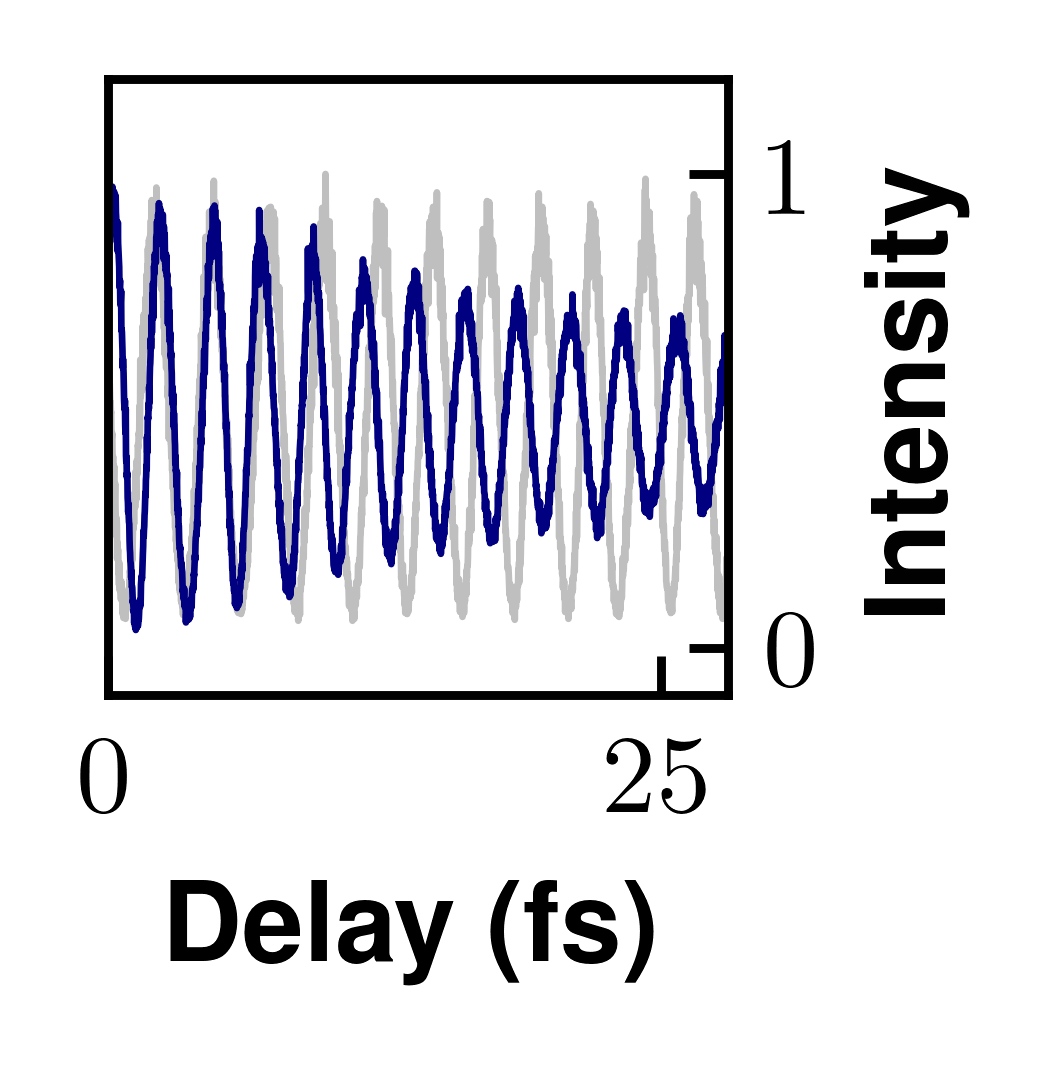

In [ ]:
fig = plt.figure(figsize=(1, 1), dpi=800)
ax = fig.add_subplot()
# Plot
ax.plot(zero_delay_fs_F+6,zero_norCts_F/max(zero_norCts_F), color="gray", alpha=0.5, linewidth = 0.6)
ax.plot(-delay_fs_NF,norCts_NF, color="navy", alpha=1, linewidth = 0.6)
ax.set_xlim(0,28)
ax.set_ylim(-0.1,1.2)
#ax.text(19, 1, r'\textbf{b)}', fontsize=font_size-3)
ax.set_xlabel(r'\textbf{Delay (fs)}', fontsize=font_size, fontfamily=font)
ax.set_ylabel(r'\textbf{Intensity}', fontsize=font_size, fontfamily=font)
ax.tick_params(axis='both', which='major', direction = 'in')
ax.tick_params(which='minor', direction = 'in')
ax.yaxis.tick_right()             # ticks a la derecha
ax.yaxis.set_label_position("right")  # etiqueta del eje a la derecha

In [ ]:

import seaborn as sbs

#Spectrally filtered data
uploaded = fl.upload()
scan = list(uploaded.keys())[0]

Saving 2024_7_29_10_26_21_ROIscan.txt to 2024_7_29_10_26_21_ROIscan.txt


In [ ]:
XYint = np.loadtxt(scan, delimiter=',',skiprows=1)

print(XYint)

[[ 322.  318.  332. ... 1347. 1464. 1349.]
 [ 324.  347.  347. ... 1184. 1265. 1283.]
 [ 330.  297.  309. ... 1085. 1067. 1157.]
 ...
 [4335. 4149. 3648. ... 1386. 1497. 1539.]
 [2705. 2655. 2259. ... 1396. 1284. 1358.]
 [1621. 1683. 1431. ... 1566. 1365. 1506.]]


Text(2.6, 7, '2$\\mu m$')

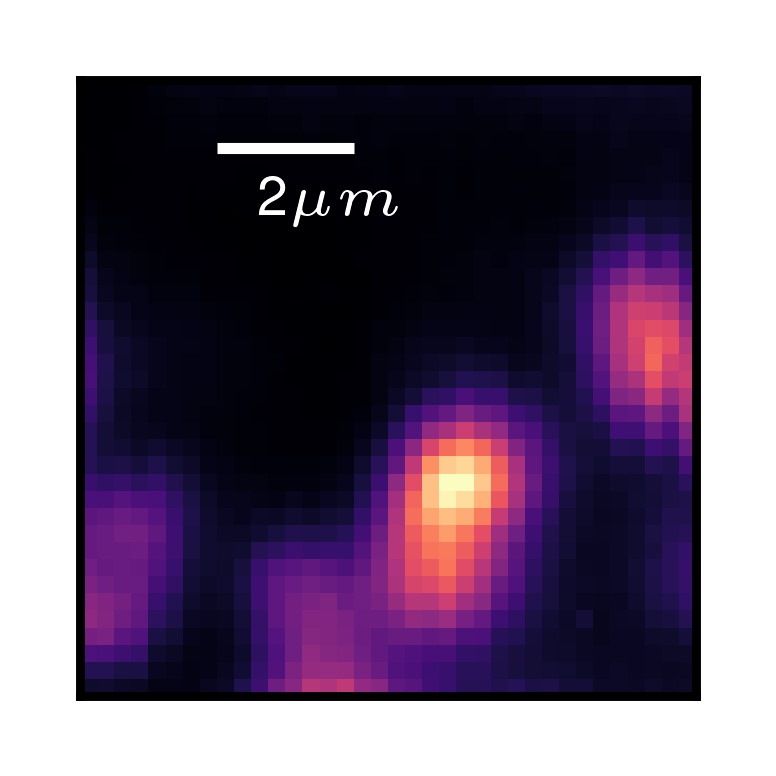

In [ ]:


# Convert steps to distance
step_size = 0.25  # 0.25 nm per steps
distance_x = XYint.shape[1] * step_size  # Total distance in x direction
distance_y = XYint.shape[0] * step_size  # Total distance in y direction

fig = plt.figure(figsize=(1, 1), dpi=800)
ax = fig.add_subplot()
#ax.set_xlabel('Distance ($\mu m$)')
#ax.set_ylabel('Distance ($\mu m$)')
im = ax.imshow(XYint,cmap='magma',extent=[0, distance_x, 0, distance_y],vmax=None)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticks([])
ax.set_yticks([])
plt.hlines(y=8, xmin=2, xmax=4, color='white', linewidth=1)
plt.text(2.6,7,r'2$\mu m$', color='white', fontsize =5)
 # Create colorbar
#cbar = ax.figure.colorbar(im, ax=ax)
#cbar.ax.set_ylabel('Single counts', rotation=-90, va="bottom")
#plt.savefig('C:/Users/EQUIPO/Desktop/HBN scanner/QOSS/data/plots/2024_7_29_10_26_21_ROIscan.pdf')

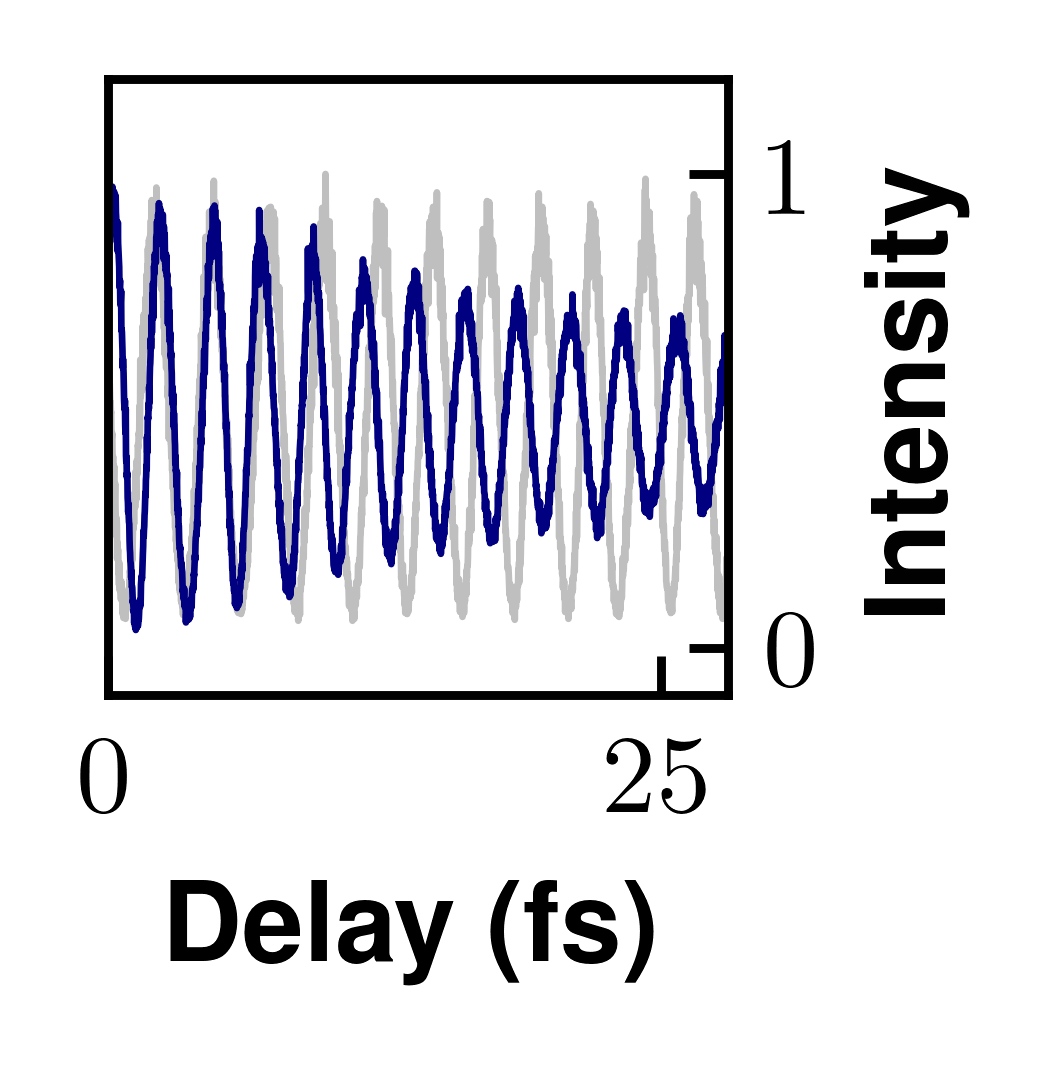

In [ ]:
fig = plt.figure(figsize=(1, 1), dpi=800)
ax = fig.add_subplot()
# Plot
ax.plot(zero_delay_fs_F+6,zero_norCts_F/max(zero_norCts_F), color="gray", alpha=0.5, linewidth = 0.6)
ax.plot(-delay_fs_NF,norCts_NF, color="navy", alpha=1, linewidth = 0.6)
ax.set_xlim(0,28)
ax.set_ylim(-0.1,1.2)
#ax.text(19, 1, r'\textbf{b)}', fontsize=font_size-3)
ax.set_xlabel(r'\textbf{Delay (fs)}', fontsize=font_size, fontfamily=font)
ax.set_ylabel(r'\textbf{Intensity}', fontsize=font_size, fontfamily=font)
ax.tick_params(axis='both', which='major', direction = 'in')
ax.tick_params(which='minor', direction = 'in')
ax.yaxis.tick_right()             # ticks a la derecha
ax.yaxis.set_label_position("right")  # etiqueta del eje a la derecha

Text(2.6, 7, '2$\\mu m$')

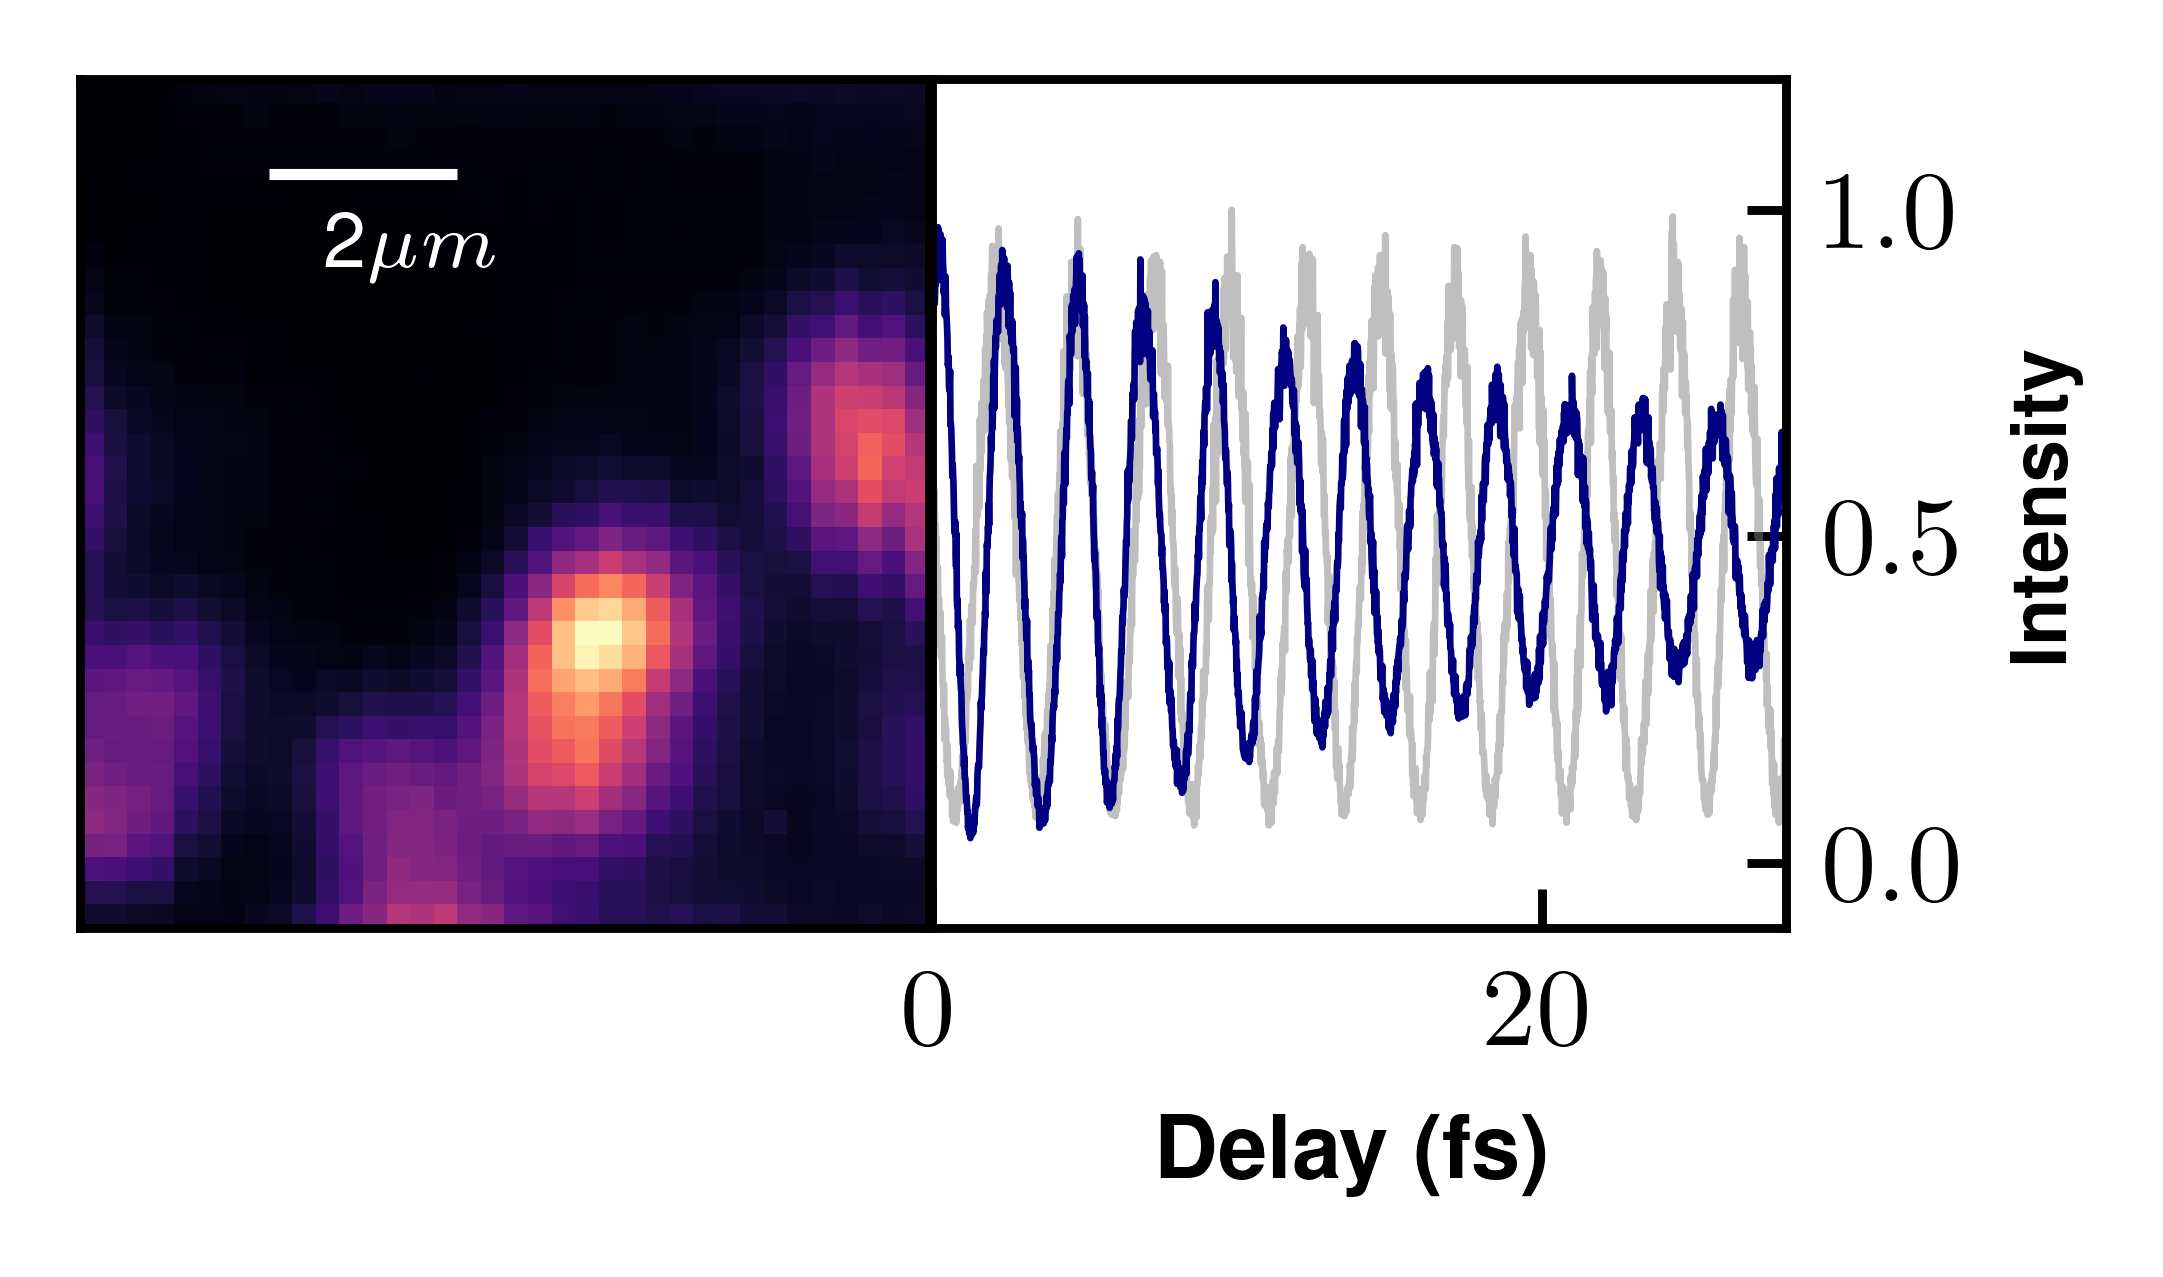

In [ ]:
# prompt: Necesito una figura con dos subplots cuadrados (uno al lado del otro). La figura debe caber en un recuadro de 9 x 3.5 cm. Necesito que las figuras estén lo más juntas posibles.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure and gridspec
fig = plt.figure(figsize=(7/2.54, 3.5/2.54), dpi=800)  # Figure size in inches
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0) # Two subplots, width_ratios for equal size

# Add the subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot
ax2.plot(zero_delay_fs_F+6,zero_norCts_F/max(zero_norCts_F), color="gray", alpha=0.5, linewidth = 0.6)
ax2.plot(-delay_fs_NF,norCts_NF, color="navy", alpha=1, linewidth = 0.6)
ax2.set_xlim(0,28)
ax2.set_ylim(-0.1,1.2)
#ax2.text(19, 1, r'\textbf{b)}', fontsize=font_size-3)
ax2.set_xlabel(r'\textbf{Delay (fs)}', fontsize=font_size-2, fontfamily=font)
ax2.set_ylabel(r'\textbf{Intensity}', fontsize=font_size-3, fontfamily=font)
ax2.tick_params(axis='both', which='major', direction = 'in')
ax2.tick_params(which='minor', direction = 'in')
ax2.yaxis.tick_right()             # ticks a la derecha
ax2.yaxis.set_label_position("right")  # etiqueta del eje a la derecha

ax1.imshow(XYint,cmap='magma',extent=[0, distance_x, 0, distance_y],vmax=None)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.hlines(y=8, xmin=2, xmax=4, color='white', linewidth=1)
ax1.text(2.6,7,r'2$\mu m$', color='white', fontsize =7)

# Save dagta

In [ ]:
fl.download("datosVisibilidadF2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>